In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
%matplotlib inline

In [17]:
df=pd.read_csv('Melbourne_housing_full.csv')
print(len(df))
df=df.dropna()
print(df.describe())

34857
            Rooms         Price     Distance     Postcode     Bedroom2  \
count  8895.00000  8.895000e+03  8895.000000  8895.000000  8895.000000   
mean      3.09882  1.092524e+06    11.202136  3111.698033     3.078134   
std       0.96359  6.792066e+05     6.815113   112.781766     0.966070   
min       1.00000  1.310000e+05     0.000000  3000.000000     0.000000   
25%       2.00000  6.405000e+05     6.400000  3044.000000     2.000000   
50%       3.00000  9.000000e+05    10.200000  3083.000000     3.000000   
75%       4.00000  1.345000e+06    13.900000  3150.000000     4.000000   
max      12.00000  9.000000e+06    47.400000  3977.000000    12.000000   

          Bathroom          Car      Landsize  BuildingArea    YearBuilt  \
count  8895.000000  8895.000000   8895.000000   8895.000000  8895.000000   
mean      1.646655     1.692636    523.395166    149.295708  1965.777403   
std       0.721388     0.975393   1060.940841     87.898565    37.055054   
min       1.000000     

In [19]:
#df.Date= pd.to_numeric(df.Date)
df.Date = pd.to_datetime(df.Date,format='%d/%m/%Y', errors='coerce')
print(df.head())
print(df.Regionname.unique())

        Suburb          Address  Rooms Type      Price Method SellerG  \
2   Abbotsford  25 Bloomburg St      2    h  1035000.0      S  Biggin   
4   Abbotsford     5 Charles St      3    h  1465000.0     SP  Biggin   
6   Abbotsford      55a Park St      4    h  1600000.0     VB  Nelson   
11  Abbotsford     124 Yarra St      3    h  1876000.0      S  Nelson   
14  Abbotsford    98 Charles St      2    h  1636000.0      S  Nelson   

         Date  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
2  2016-04-02       2.5    3067.0       2.0       1.0  0.0     156.0   
4  2017-04-03       2.5    3067.0       3.0       2.0  0.0     134.0   
6  2016-04-06       2.5    3067.0       3.0       1.0  2.0     120.0   
11 2016-07-05       2.5    3067.0       4.0       2.0  0.0     245.0   
14 2016-08-10       2.5    3067.0       2.0       1.0  2.0     256.0   

    BuildingArea  YearBuilt         CouncilArea             Regionname  \
2           79.0     1900.0  Yarra City Council  North

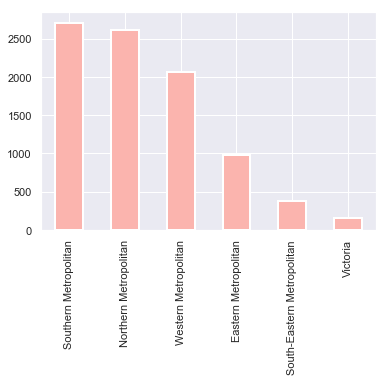

In [5]:
df['Regionname'].value_counts().plot(kind='bar',linewidth=2,colormap='Pastel1') 

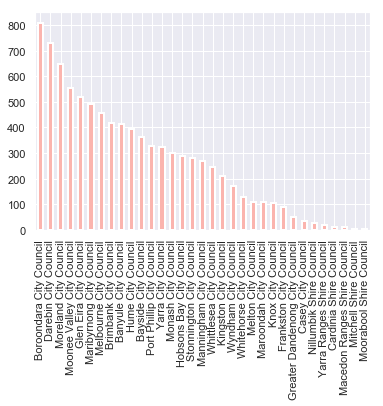

In [6]:
df['CouncilArea'].value_counts().plot(kind='bar',linewidth=2,colormap='Pastel1')

C:\Users\alehe\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


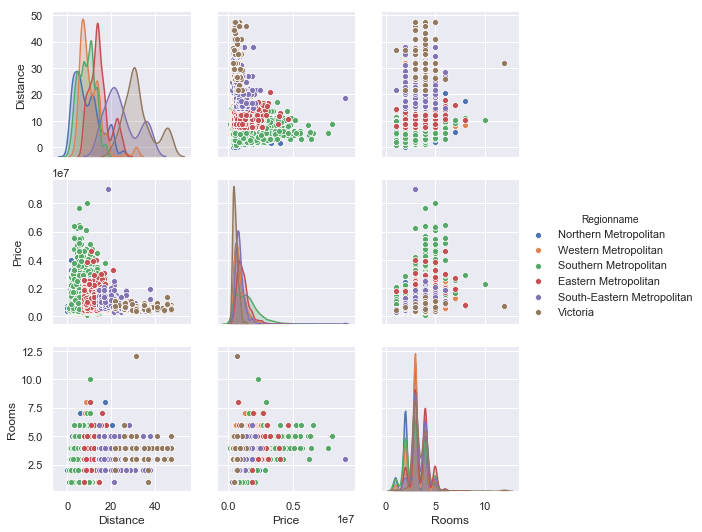

In [5]:
sns.pairplot(data=df, vars=['Distance','Price','Rooms'], hue = 'Regionname')

In [109]:
#groups=df.groupby(by='Regionname').median()

#print(groups['Price'])
#df.sort_values(by='Price').median()
med_price = df.groupby('Regionname')['Price'].agg(np.median)
print(med_price.sort_values(ascending=False))
med_rooms = df.groupby('Regionname')['Rooms'].agg(np.median)
print(med_rooms)

Regionname
Southern Metropolitan         1350000.0
Eastern Metropolitan          1060000.0
South-Eastern Metropolitan     840000.0
Western Metropolitan           773000.0
Northern Metropolitan          770000.0
Victoria                       530250.0
Name: Price, dtype: float64
Regionname
Eastern Metropolitan          3
Northern Metropolitan         3
South-Eastern Metropolitan    3
Southern Metropolitan         3
Victoria                      3
Western Metropolitan          3
Name: Rooms, dtype: int64


C:\Users\alehe\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  import sys


Date    Date
2016.0  3.0     1.214349e+06
        4.0     1.033842e+06
        6.0     1.011378e+06
        7.0     1.039245e+06
        8.0     1.011684e+06
        10.0    1.159979e+06
        12.0    1.147341e+06
2017.0  1.0     8.614342e+05
        3.0     1.082189e+06
        4.0     1.093797e+06
Name: Price, dtype: float64


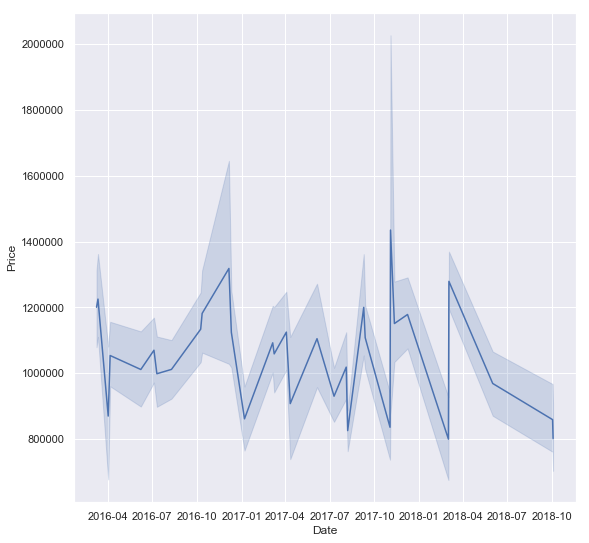

In [111]:
#Make plot of monthly median price through time
from pandas import Series
year = df['Date'].dt.year
month= df['Date'].dt.month
#index=pd.date_range(start="01/01/2016",periods= 36, freq="M")

monthlymean = df['Price'].groupby((year, month)).mean()
print(approach2.head(10))
plt.figure(figsize=(9,9))

sns.lineplot(x=df['Date'],y=df['Price'],data=monthlymean, legend=False)
plt.show()
#approach2.plot(x=df['Date'].dt.month, kind='line')
#ao = Series(df['Price'].mean(), index=df['Date'])
#approach2.plot()

In [254]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.tree import DecisionTreeRegressor as DTR

#X =pd.get_dummies(df[['Suburb','Type', 'Method', 'Distance','Bedroom2']])
#subohe = 
X= newdf
y= df['Price']

dtr=DTR(random_state=0)
X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.3,random_state=1)
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)
mse_dtr = MSE(y_test, y_pred)

# What is the RMSE of our model?
rmse_dtr = mse_dtr**(1/2)
print("Test set RMSE of dtr: {:.2f}".format(rmse_dtr))
print(df['Price'].median())

ValueError: Found input variables with inconsistent numbers of samples: [3, 8895]

In [252]:
from pandas import DataFrame
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#suburb= OneHotEncoder.fit_transform(X=df['Suburb']).toarray()
le=LabelEncoder()
typele = le.fit_transform(df['Type'])
suburble = le.fit_transform(df['Suburb'])

ohe= OneHotEncoder(sparse=False)
suburble = suburble.reshape(len(suburble), 1)
suburbohe = ohe.fit_transform(suburble)
typele = typele.reshape(len(typele), 1)
typeohe= ohe.fit_transform(typele)
newdf = DataFrame([df['YearBuilt'],df['Distance'],suburbohe, typeohe])

print(newdf.head)

C:\Users\alehe\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\alehe\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you us

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [255]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr= LinearRegression()
lr.fit(X_train, y_train)
# Predict test set labels 
y_pred_lr = lr.predict(X_test)
mse_lr = MSE(y_test, y_pred_lr)

# Compute rmse_lr
rmse_lr = mse_lr**0.5

# Print rmse_lr
print("Root mean squared error: %.3f"
      % mean_squared_error(y_test, y_pred_lr)**0.5)
#print('Linear Regression test set RMSE: {:.2f}'.format(rmse_lr))
print("Median predicted price: %.3f" % df['Price'].median())

Root mean squared error: 462141714120803.562
Median predicted price: 900000.000


In [256]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)
ypred=ridge.predict(X_test)
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
print('Training R2 score: %.3f' %train_score)
print('Test score: %.3f' %test_score)

Ridge_train_score = ridge.score(X_train,y_train)
Ridge_test_score = ridge.score(X_test, y_test)
print('Ridge training R2 score: %.3f' % Ridge_train_score)
print('Ridge test R2 score: %.3f' % Ridge_test_score)
rmse = np.sqrt(mean_squared_error(y_test,ypred))
print('Ridge RMSE: %.3f' %rmse)

Training R2 score: 0.691
Test score: -476830805132377536.000
Ridge training R2 score: 0.691
Ridge test R2 score: 0.601
Ridge RMSE: 422866.591


In [24]:
groups=df.groupby(by='Regionname')['Price'].mean()
print(groups)

Regionname
Eastern Metropolitan          1.157120e+06
Northern Metropolitan         8.772936e+05
South-Eastern Metropolitan    9.223860e+05
Southern Metropolitan         1.493323e+06
Victoria                      5.773332e+05
Western Metropolitan          8.783199e+05
Name: Price, dtype: float64


In [28]:
df2=df.assign(freq=df.groupby('Suburb')['Suburb'].transform('count')).sort_values(by=['freq','Suburb'],ascending=[False,True]).loc[:,['Suburb']]
#largest suburb
print(df2.head())
#smallest suburb
print(df2.tail())

         Suburb
8322  Reservoir
8328  Reservoir
8330  Reservoir
8333  Reservoir
8334  Reservoir
            Suburb
31371        Upwey
20882    Waterways
29969  Wattle Glen
19732   Whittlesea
19248   Yarra Glen


,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,21650.000000
